# Linear Regression Project

Analysis of a set of data from a (fake) Ecommerce company that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The Ecommerce Customers csv file from the company has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

In [2]:
costumers = pd.read_csv('Ecommerce Customers')

In [3]:
costumers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
costumers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
costumers.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg. Session Length,500.0,33.053194,0.992563,29.532429,32.341822,33.082008,33.711985,36.139662
Time on App,500.0,12.052488,0.994216,8.508152,11.388153,11.983231,12.753850,15.126994
Time on Website,500.0,37.060445,1.010489,33.913847,36.349257,37.069367,37.716432,40.005182
Length of Membership,500.0,3.533462,0.999278,0.269901,2.930450,3.533975,4.126502,6.922689
Yearly Amount Spent,500.0,499.314038,79.314782,256.670582,445.038277,498.887875,549.313828,765.518462


## Exploratory Data Analysis

Jointplot comparing the Time on Website and Yearly Amount Spent columns

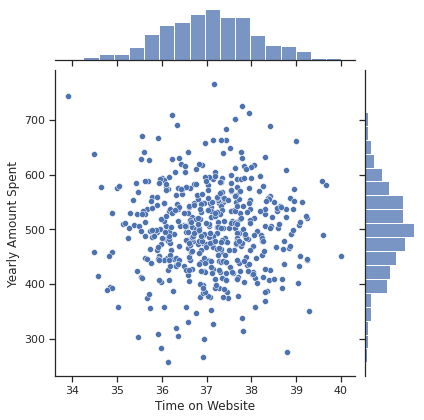

In [6]:
sns.set_theme(style="ticks")
sns.jointplot(data=costumers, x='Time on Website', y='Yearly Amount Spent')

and for the Time on App column

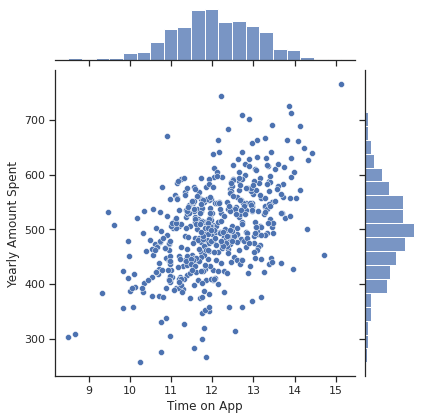

In [7]:
sns.jointplot(data=costumers, x='Time on App', y='Yearly Amount Spent')

2D hex bin plot comparing Time on App and Length of Membership

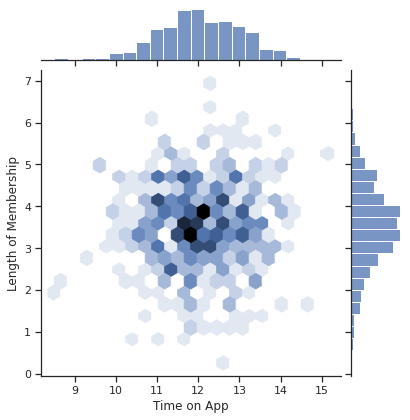

In [8]:
sns.jointplot(data=costumers, x='Time on App', y='Length of Membership', kind='hex')

And a pairplot, for general sense of the relations between variables

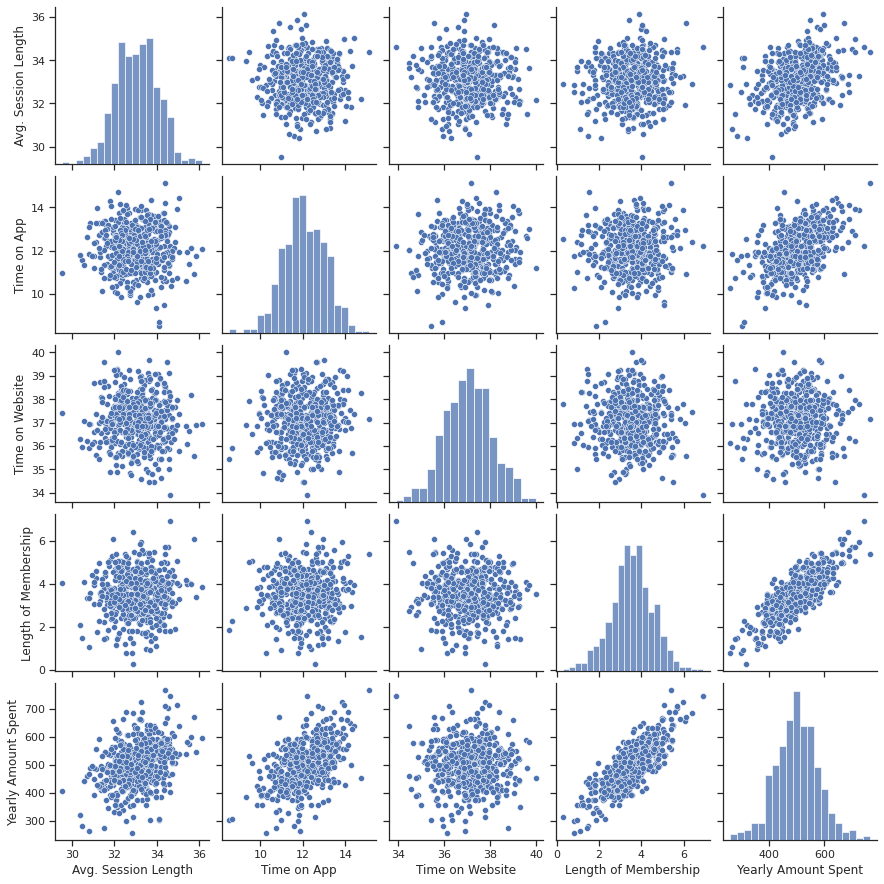

In [9]:
sns.pairplot(costumers)

In [21]:
costumers.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


It seems the most correlated variables are Length of Membership	and Yearly Amount Spent. We create a linear model plot of this variables to explore this relation

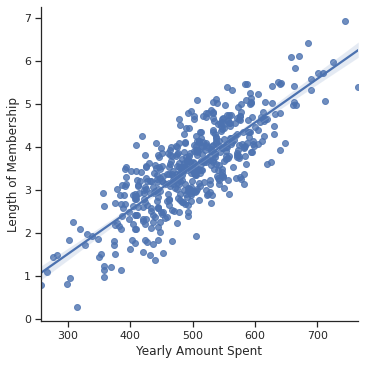

In [10]:
sns.lmplot(data=costumers, x='Yearly Amount Spent', y='Length of Membership')

## Training and Testing Data

In [16]:
X = costumers[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]

In [12]:
y = costumers['Yearly Amount Spent']

In [13]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=101)

## Fitting the Model

In [15]:
from sklearn.linear_model import LinearRegression

In [18]:
lm = LinearRegression()

In [19]:
lm.fit(X_train, y_train)

LinearRegression()

In [20]:
X.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership'],
      dtype='object')

In [21]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

## Predicting Data

In [22]:
y_predict = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

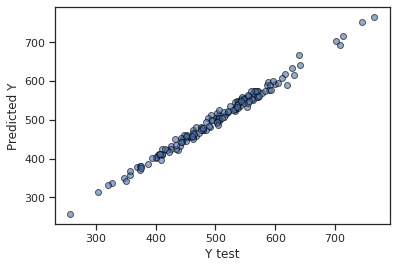

In [23]:
plt.scatter(x=y_test, y=y_predict,edgecolors='black', alpha =0.6)
plt.xlabel('Y test')
plt.ylabel('Predicted Y')

Extraordinarily good fit!

In [24]:
from sklearn import metrics

In [25]:
print('MAE:', metrics.mean_absolute_error(y_test, y_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

MAE: 7.228148653430845
MSE: 79.81305165097471
RMSE: 8.93381506697865


Histogram of the residuals

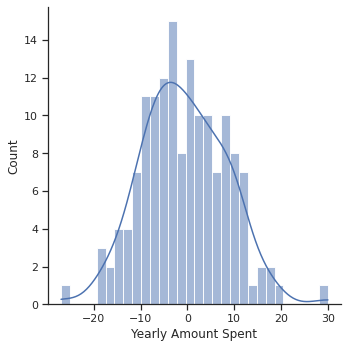

In [26]:
sns.displot((y_test-y_predict), kde=True, bins=30)

## Conclusion

In [27]:
coef = pd.DataFrame(index= X.columns,data=lm.coef_)
coef.columns = ['Coeffecient']
coef

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


The App is by far the way to go as the coeficient of the time on app has more impact than any other factor. The company can invest more in the app as it seems to produce more revenue but it also can be interpreted as a call to improve the website to fill the gap between the website and the app.